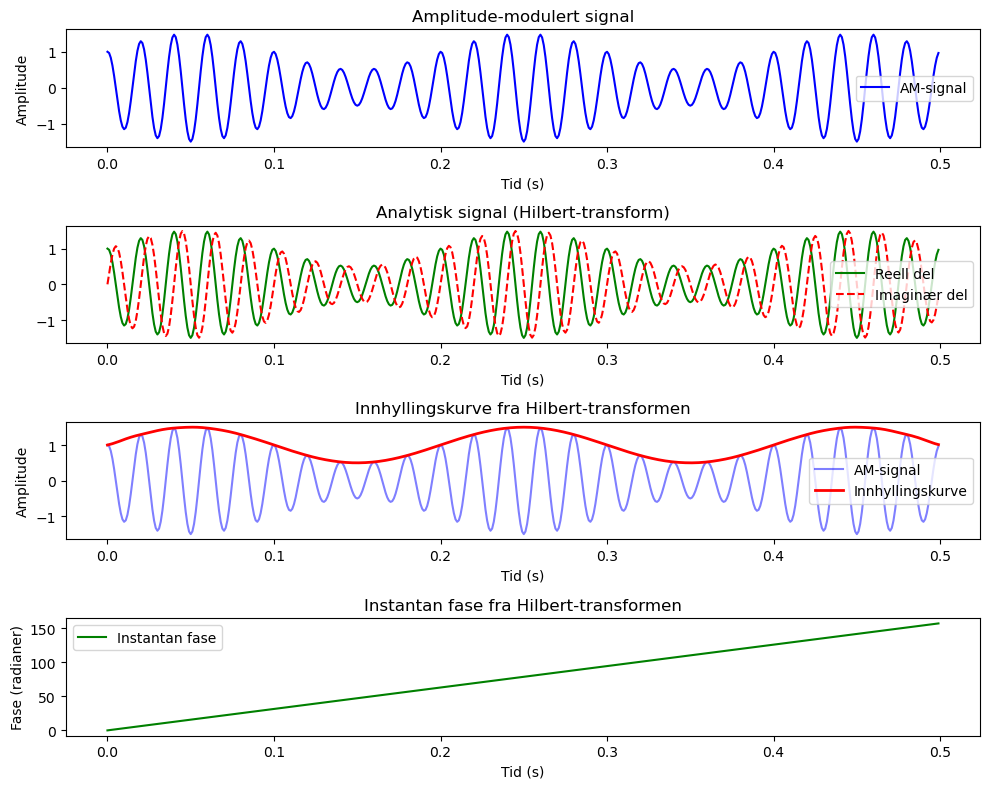

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Parametere for signalet
fs = 1000        # Samplingsfrekvens (Hz)
t = np.arange(0, 0.5, 1/fs)  # Tid (1 sek)
carrier_freq = 50  # Bærefrekvens (Hz)
mod_freq = 5       # Modulasjonsfrekvens (Hz)
mod_index = 0.5    # Modulasjonsdybde

# Generer AM-signal: (1 + m * sin(2πfmt)) * cos(2πfct)
modulation = 1 + mod_index * np.sin(2 * np.pi * mod_freq * t)
carrier = np.cos(2 * np.pi * carrier_freq * t)
am_signal = modulation * carrier

# Beregn Hilbert-transformen (analytisk signal)
analytic_signal = hilbert(am_signal)
envelope = np.abs(analytic_signal)  # Innhyllingskurve
instant_phase = np.unwrap(np.angle(analytic_signal))  # Instantan fase

# Plot resultatene
plt.figure(figsize=(10, 8))

# Originalt AM-signal
plt.subplot(4, 1, 1)
plt.plot(t, am_signal, label="AM-signal", color='b')
plt.title("Amplitude-modulert signal")
plt.xlabel("Tid (s)")
plt.ylabel("Amplitude")
plt.legend()

# Analytisk signal (real + imaginær)
plt.subplot(4, 1, 2)
plt.plot(t, analytic_signal.real, label="Reell del", color='g')
plt.plot(t, analytic_signal.imag, label="Imaginær del", linestyle="dashed", color='r')
plt.title("Analytisk signal (Hilbert-transform)")
plt.xlabel("Tid (s)")
plt.legend()

# Innhyllingskurve
plt.subplot(4, 1, 3)
plt.plot(t, am_signal, alpha=0.5, label="AM-signal", color='b')
plt.plot(t, envelope, label="Innhyllingskurve", color='r', linewidth=2)
plt.title("Innhyllingskurve fra Hilbert-transformen")
plt.xlabel("Tid (s)")
plt.ylabel("Amplitude")
plt.legend()



# Instantan fase
plt.subplot(4, 1, 4)
plt.plot(t, instant_phase, label="Instantan fase", color='g')
plt.title("Instantan fase fra Hilbert-transformen")
plt.xlabel("Tid (s)")
plt.ylabel("Fase (radianer)")
plt.legend()
plt.tight_layout()
save_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/Hilbert_Transform.jpeg"
plt.savefig(save_path, format="jpeg", dpi=300)

plt.show()



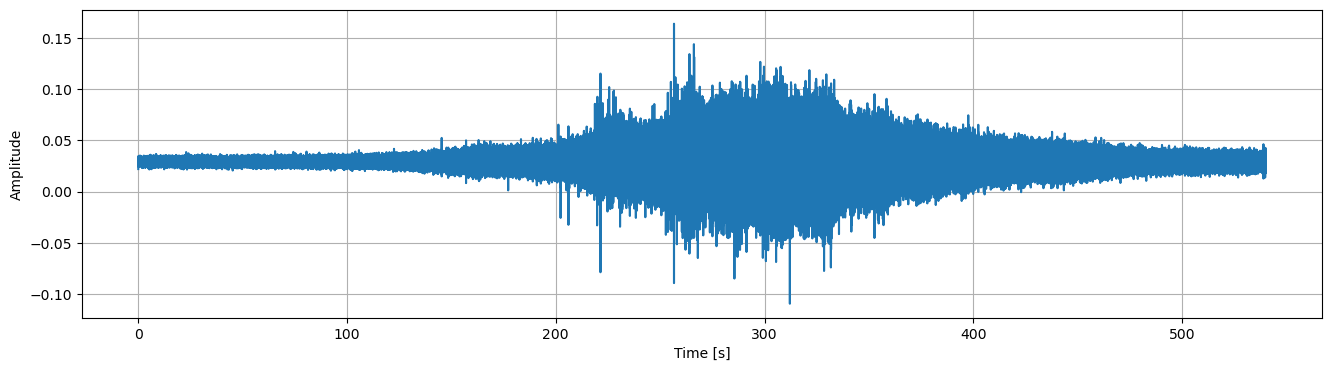

In [14]:
import functions
from scipy import signal
import librosa
#Broad band and Demon testing
input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"
output_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/Signal_plot.jpeg"
x,fs = librosa.load(input_file)
t = np.linspace(0,len(x)/fs,len(x))
sig = functions.plot_signal(x,t,output_path)